# ${\color{purple}\mathbb{NAMES:}}$
1- ${\color{red}Yuval\ Kaver}$, id: 329

2- ${\color{red}Matan\ Ginzburg}$, id: 215

In [43]:
import numpy as np
import sympy as sy  #for integral...
import scipy            #for integral
import scipy.integrate
import matplotlib.pyplot as plt
import math

In [44]:
import pydub
from pydub import AudioSegment
from scipy.io.wavfile import write

audio_strange = r"\Users\matan\Documents\Visual Code thong\DIGITAL SIGNAL P(OTOT)\strangemusic (1).mp3"

In [45]:
sound_strange = AudioSegment.from_file(audio_strange)
sound_strange

--------

# ${\color{pink}{Best- One}}$

In [119]:
def improved_haar_wavelet2(sigs, threshold=0):
    n = len(sigs)
    if n < 3:
        return np.array([])

    sig_averages = np.zeros(n - 2)
    sig_diff = np.zeros(n - 2)
    transformed_sigs = np.zeros(n - 2)

    for i in range(1,n-2):

        sig_averages[i] = (sigs[i + 1] + sigs[i - 1]) / 2.0     #i-1 cuz we want the first
        sig_diff[i] = sigs[i + 1] - sigs[i - 1]
        
        if abs(sig_diff[i]) < threshold:
            sig_diff[i] = 0.0
        else:
            sig_diff[i] = sig_diff[i]

        transformed_sigs[i] = sig_averages[i] + sig_diff[i] #mby


#for the edges:(like padding)
    sig_averages[0] = sig_averages[1]
    sig_diff[0] = sig_diff[1]
    transformed_sigs[0] = transformed_sigs[1]
#    sig_averages[n-2] = sig_averages[n-2]
 #   sig_diff[n-2] = sig_diff[n-2]
 #   transformed_sigs[n-2] = transformed_sigs[n-2]
#so that it will have something

    return sig_averages,sig_diff,transformed_sigs


def improved_inverse_haar_wavelet2(transformed_sigs,sig_averages,sig_diff, original_length=0): 
    n = len(transformed_sigs)
    sig_averages_new = np.zeros(n)
    sig_diff_new = np.zeros(n)

    if n == 0:
        return np.array([])
    reconstructed_sigs = np.zeros(n) 
    #reconstructed_sigs[1:original_length - 1] = transformed_sigs    #fill middle


    for i in range(1, n -2):
        sig_averages_new[i] = (sig_averages[i + 1] - sig_averages[i - 1]) * 2.0
        sig_diff_new[i] =  sig_diff[i + 1] + sig_diff[i - 1]
    
    #for i=0, i =n-1:
    sig_averages_new[0] = sig_averages_new[1]
    sig_diff_new[0] = sig_diff_new[1]
   # sig_averages_new[n-2] = sig_averages_new[n-2]
  #  sig_diff_new[n-2] = sig_diff_new[n-2]

    for j in range(1,n//2):
        reconstructed_sigs[2*j] = sig_averages_new[j] +  sig_diff_new[j]
        reconstructed_sigs[2*j +1] =  sig_averages_new[j] - sig_diff_new[j]  


    reconstructed_sigs


    return reconstructed_sigs




----

------

In [120]:
#loading + normilizing
sound_strange = AudioSegment.from_file(audio_strange)
signal = np.array(sound_strange.get_array_of_samples(), dtype="float32")
signal_normlized = signal / np.max(np.abs(signal))

In [121]:
threshold=0
signal_len = len(signal)
c_0,d_0,transformed_signal_0 = improved_haar_wavelet2(signal_normlized, threshold)

inverse_transformed_signal_0 = improved_inverse_haar_wavelet2(transformed_signal_0,c_0,d_0,signal_len)

#inverse_transformed_signal_streched_0 = inverse_transformed_signal_0 * np.max(np.abs(signal))

# Clip and Convert to int16 
# ah?
int16_signal = np.clip(inverse_transformed_signal_0 * 32767, -32768, 32767).astype(np.int16)
write("haar_transformed_audio_threshold0.wav", 2*sound_strange.frame_rate, int16_signal)

In [122]:
threshold=0.01
signal_len = len(signal)
c_1,d_1,transformed_signal_1 = improved_haar_wavelet2(signal_normlized, threshold)

inverse_transformed_signal_1 = improved_inverse_haar_wavelet2(transformed_signal_1,c_1,d_1,signal_len)

#inverse_transformed_signal_streched_1 = inverse_transformed_signal_1 * np.max(np.abs(signal))

# Clip and Convert to int16 
# ah?
int16_signal = np.clip(inverse_transformed_signal_1 * 32767, -32768, 32767).astype(np.int16)
write("haar_transformed_audio_threshold1.wav", 2*sound_strange.frame_rate, int16_signal)

In [123]:
threshold=0.5
signal_len = len(signal)
c_2,d_2,transformed_signal_2 = improved_haar_wavelet2(signal_normlized, threshold)

inverse_transformed_signal_2 = improved_inverse_haar_wavelet2(transformed_signal_2,c_2,d_2,signal_len)


#inverse_transformed_signal_streched_2 = inverse_transformed_signal_2 * np.max(np.abs(signal))

# Clip and Convert to int16 
# ah?
int16_signal = np.clip(inverse_transformed_signal_2 * 32767, -32768, 32767).astype(np.int16)
write("haar_transformed_audio_threshold2.wav", 2*sound_strange.frame_rate, int16_signal)

In [ ]:
#threshold = 0.01

[ 2.0746647e-03  2.9318742e-03  3.7803967e-03 ... -4.2069323e-06
 -2.1732062e-06 -5.1157201e-07]


c:\Users\matan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


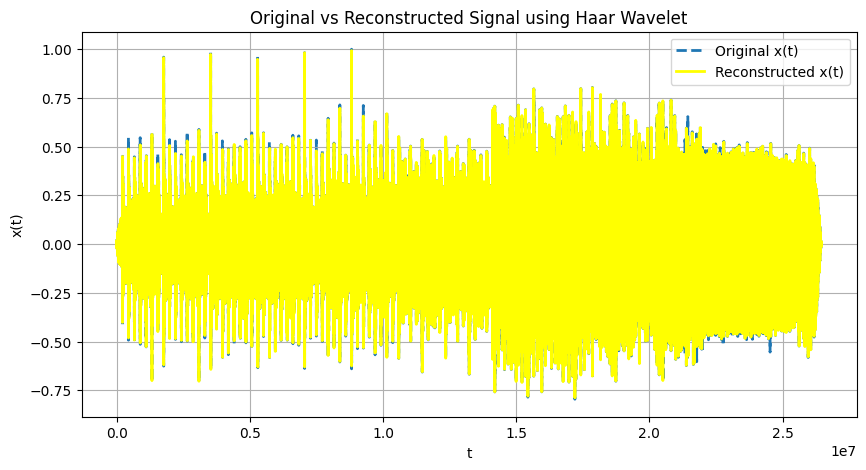

In [124]:
import pywt

# Perform Haar wavelet transform using PyWavelets
coeffs = pywt.dwt(signal_normlized, 'haar')
print(coeffs[0])
reconstructed_x = pywt.idwt(*coeffs, 'haar')

# Plot original and reconstructed function
plt.figure(figsize=(10, 5))

plt.plot(reconstructed_x, label='Original x(t)', linestyle='dashed', linewidth=2)
plt.plot(c_0, label='Reconstructed x(t)',color="yellow", linewidth=2)

#plt.plot(c_0, label='Reconstructed x(t)', linewidth=2)
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Original vs Reconstructed Signal using Haar Wavelet')
plt.grid()
plt.show()

------

# ${\color{pink}{Error:}}$

In [125]:
def calc_error_mse(original_sig,new_sig):

    sum = 0
    n= len(original_sig)
    for i in range(n-2):
        sum = sum + (original_sig[i] - new_sig[i] )**2
        
    sum = sum/n
    return sum

In [126]:
def compression_ratio(original_sig,new_sig):

    new_sig_nonzero = np.count_nonzero(new_sig)
  
    ration_new = new_sig_nonzero / len(new_sig)

    #print(len(new_sig),"new_sig\n",new_sig)
    #print(new_sig_nonzero,"nonzero\n",new_sig_nonzero)
    
    #original_sig_nonzero = np.nonzero(original_sig)
    #ration_original = len(original_sig_nonzero) / len(original_sig)

    return ration_new

In [127]:
mse_0 = calc_error_mse(signal_normlized,inverse_transformed_signal_0)   #
mse_0_01 = calc_error_mse(signal_normlized,inverse_transformed_signal_1)   #
mse_0_5 = calc_error_mse(signal_normlized,inverse_transformed_signal_2)   #

ratio0 = compression_ratio(signal_normlized,inverse_transformed_signal_0)
ratio1 = compression_ratio(signal_normlized,inverse_transformed_signal_1)
ratio2 = compression_ratio(signal_normlized,inverse_transformed_signal_2)


print("Threshold 0\nMSE:",mse_0,"\ncompression ratio:",ratio0)
print("Threshold 0.01\nMSE:",mse_0_01,"\ncompression ratio:",ratio1)
print("Threshold 0.5\nMSE:",mse_0_5,"\ncompression ratio:",ratio2)



Threshold 0
MSE: 0.010747886481022428 
compression ratio: 0.8304163711137357
Threshold 0.01
MSE: 0.010686774146413473 
compression ratio: 0.9843543608266415
Threshold 0.5
MSE: 0.010423962364907188 
compression ratio: 0.9999988660443871


# ${\color{pink}{Plotting:}}$

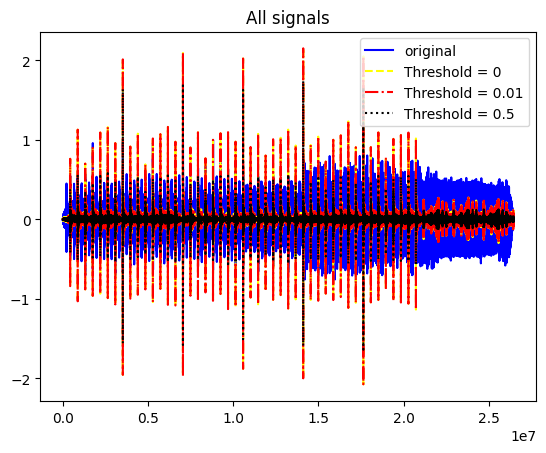

In [128]:
#signal , normilized_signal ,inverse_transformed_signal 
aprrox_coefficients = np.nonzero(c_0)
detail_coefficients = np.nonzero(d_0)


# Plot multiple graphs
plt.plot(signal_normlized,label='original', color='blue', linestyle='-')
plt.plot(inverse_transformed_signal_0,label='Threshold = 0', color='yellow', linestyle='--')
plt.plot(inverse_transformed_signal_1, label='Threshold = 0.01', color='red', linestyle='-.')
plt.plot(inverse_transformed_signal_2, label='Threshold = 0.5', color='black', linestyle=':')
plt.legend()
plt.title("All signals")
#plt.plot(x, detail_coefficients, label='cos(x)', color='red', linestyle='--')

plt.show()

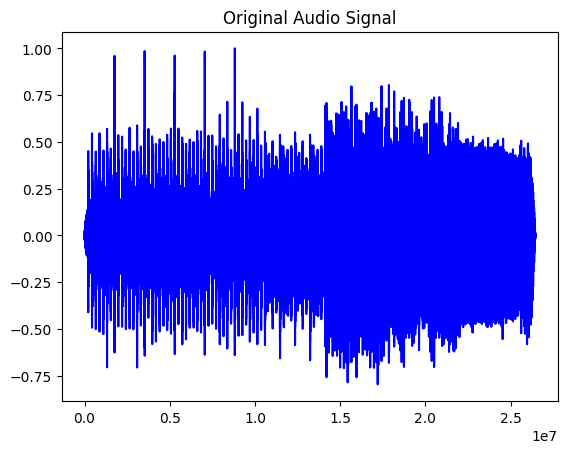

In [129]:
plt.plot(signal_normlized,label='original', color='blue', linestyle='-')
plt.title("Original Audio Signal")
plt.show()

# ${\color{pink}{Coefficients:}}$

In [130]:
print(type(c_0))

<class 'numpy.ndarray'>


In [134]:
print(c_0)
print(len(c_0))

[ 8.19731154e-04  8.19731154e-04  2.72042677e-03 ... -2.71838030e-06
 -1.79305903e-06 -1.18506068e-06]
26456062


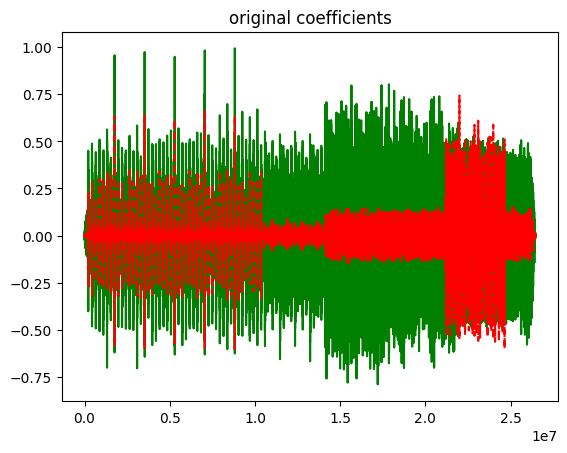

In [135]:
plt.plot(c_0,label='approximation coefficient', color='green', linestyle='-')
plt.plot(d_0,label='details coefficient', color='red', linestyle='--')
plt.title("original coefficients")
plt.show()

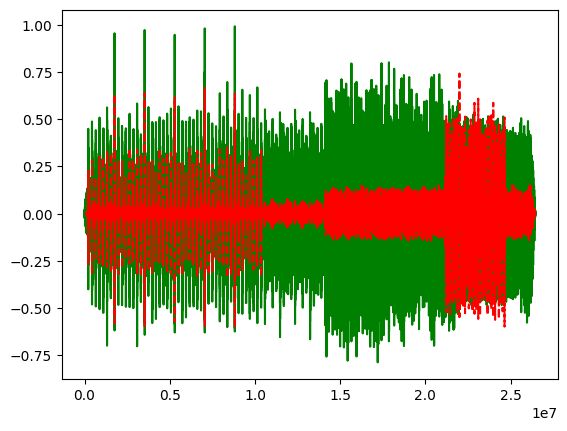

In [136]:
plt.plot(c_1,label='approximation coefficient ,', color='green', linestyle='-')
plt.plot(d_1,label='details coefficient', color='red', linestyle='--')
plt.show()

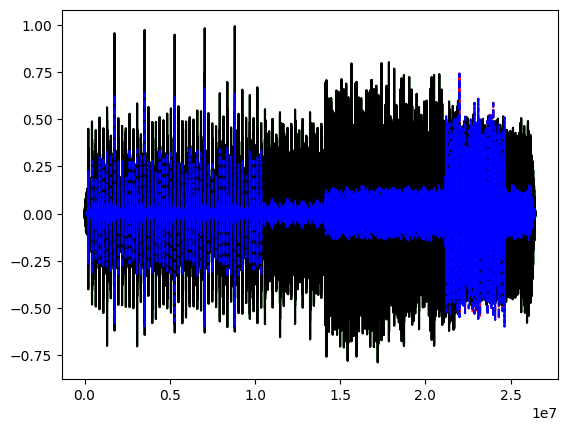

In [137]:
plt.plot(c_0,label='approximation coefficient', color='green', linestyle='-')
plt.plot(d_0,label='details coefficient', color='red', linestyle='--')
plt.plot(c_1,label='approximation coefficient ,', color='black', linestyle='-')
plt.plot(d_1,label='details coefficient', color='blue', linestyle='--')

plt.show()

----